In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(X.shape, y[y==1].shape[0], y[y==0].shape[0]))
print(cancer.data[0])

data shape: (569, 30); no. positive: 357; no. negative: 212
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train score: {:.6f}; test score: {:.6f}'.format(train_score, test_score))

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train score: 0.960440; test score: 0.947368


In [7]:
import numpy as np

In [9]:
y_pred = model.predict(X_test)

In [12]:
np.equal(y_pred, y_test).shape[0], y_test.shape[0]

(114, 114)

In [13]:
y_pred_proba = model.predict_proba(X_test)
print('sample of predict probability: {0}'.format(y_pred_proba[0]))

y_pred_proba_0 = y_pred_proba[:, 0] > 0.1
result = y_pred_proba[y_pred_proba_0]

y_pred_proba_1 = result[:, 1] > 0.1
print(result[y_pred_proba_1])

sample of predict probability: [0.97797446 0.02202554]
[[0.16141359 0.83858641]
 [0.10032827 0.89967173]
 [0.2059762  0.7940238 ]
 [0.10978392 0.89021608]
 [0.34439567 0.65560433]
 [0.37140514 0.62859486]
 [0.20027443 0.79972557]
 [0.81650167 0.18349833]
 [0.10470228 0.89529772]
 [0.28723458 0.71276542]
 [0.80388124 0.19611876]
 [0.1605663  0.8394337 ]
 [0.26069233 0.73930767]
 [0.85118745 0.14881255]
 [0.73347066 0.26652934]
 [0.12277518 0.87722482]
 [0.89783491 0.10216509]
 [0.80462121 0.19537879]
 [0.36051279 0.63948721]
 [0.83696455 0.16303545]
 [0.46059938 0.53940062]
 [0.7254125  0.2745875 ]
 [0.82176607 0.17823393]
 [0.19351872 0.80648128]]


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [15]:
def polynomial_model(degree=1, **kwarg):
    polynomial_feature = PolynomialFeatures(degree=degree, include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipline = Pipeline([("polynomial_feature", polynomial_feature), ("logistic_regression", logistic_regression)])
    return pipline

In [16]:
import time

In [17]:
model = polynomial_model(degree=2, penalty='l1')
start = time.clock()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train score: {1:.6f}; cv score: {2:.6f}'.format(time.clock()-start, train_score, cv_score))

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


elaspe: 0.360183; train score: 1.000000; cv score: 0.947368


In [18]:
logistic_regression = model.named_steps['logistic_regression']
print('model parameters shape: {0}; count of non-zero element: {1}'.format(logistic_regression.coef_.shape, 
                                                                           np.count_nonzero(logistic_regression.coef_)))

model parameters shape: (1, 495); count of non-zero element: 84


In [19]:
import sys
sys.path.append('..')

In [20]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, incre

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, incre

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

elaspe: 21.024980


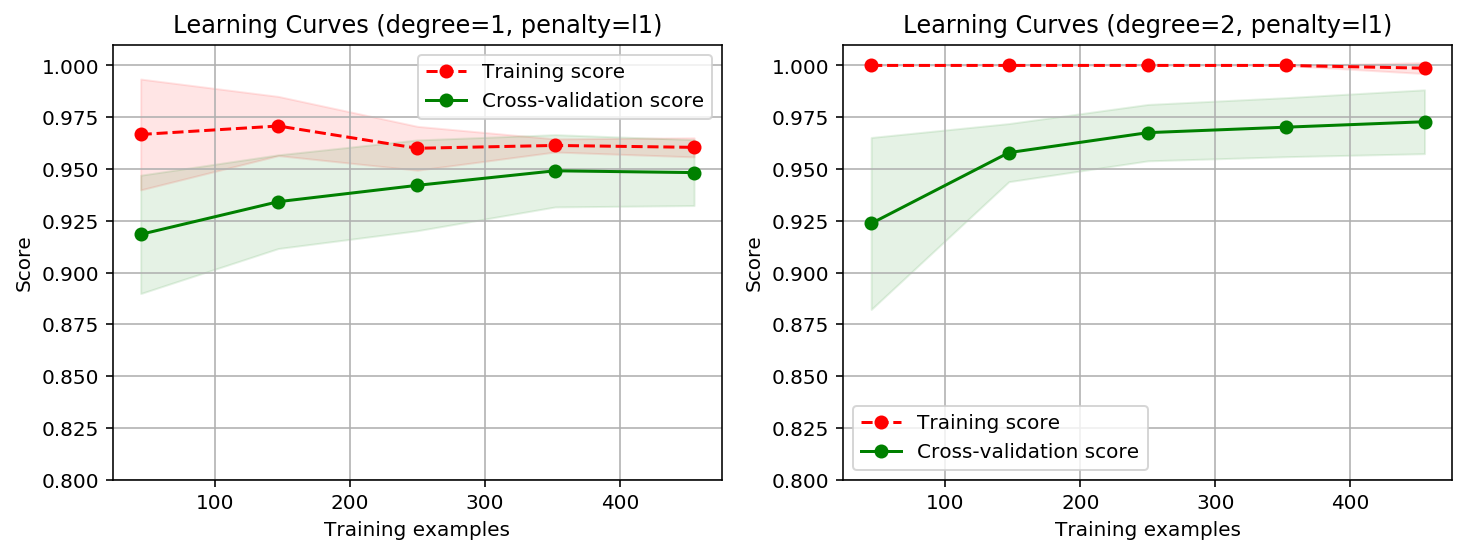

In [23]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l1'

start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i+1)
    plot_learning_curve(
        plt,
        polynomial_model(degree=degrees[i], penalty=penalty),
        title.format(degrees[i], penalty),
        X,
        y,
        ylim=(0.8, 1.01),
        cv=cv
    )
print('elaspe: {0:.6f}'.format(time.clock()-start))

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase t

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase t

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase t

elaspe: 5.972389


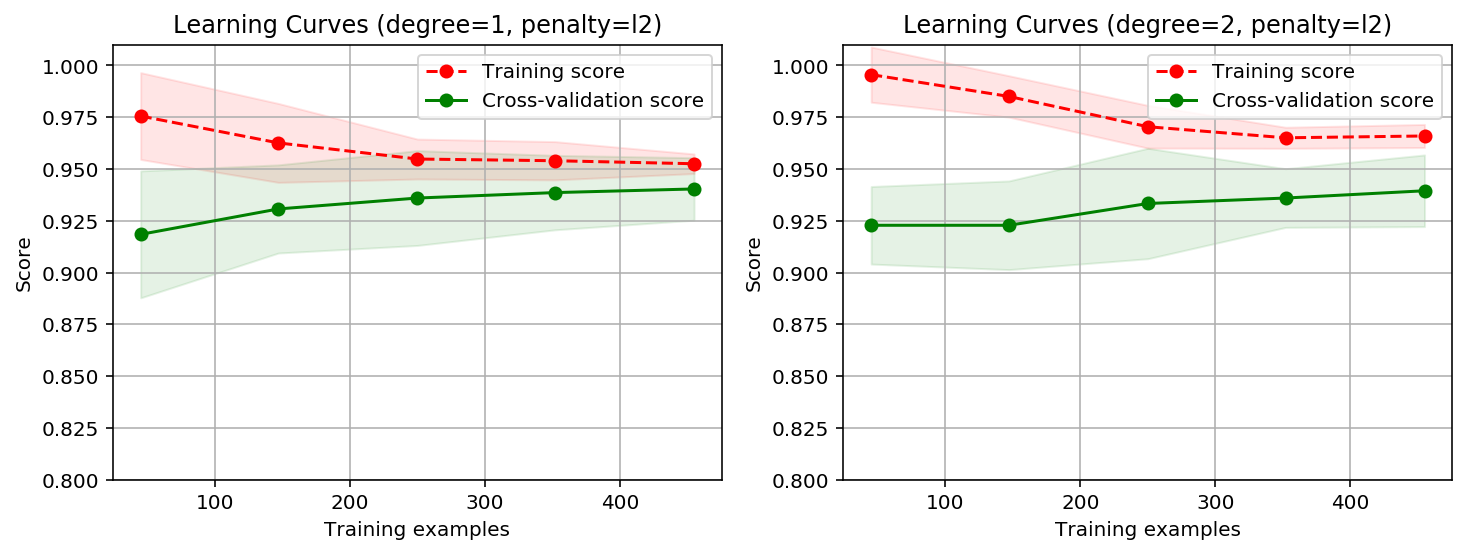

In [24]:
penalty = 'l2'
start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i+1)
    plot_learning_curve(
        plt,
        polynomial_model(degree=degrees[i], penalty=penalty, solver='lbfgs'),
        title.format(degrees[i], penalty),
        X,
        y,
        ylim=(0.8, 1.01),
        cv=cv
    )
print('elaspe: {0:.6f}'.format(time.clock()-start))